In [1]:
from time import gmtime
from time import time
from IPython.display import clear_output
tmstart = gmtime()

In [2]:
from ece470_lib import *

inTOmm = 25.4;

# Joint Axes Orientations
a0 = [0,0,1];
a1 = [0,-1,0];
a2 = [0,-1,0];
a3 = [0,-1,0];
a4 = [1,0,0];
a5 = [1,0,0];

# Joint Axes Positions (Ant point on axis)
q0 = [0,0,0];
q1 = [3.76*inTOmm,0,8.11*inTOmm];
q2 = [11.76*inTOmm,0,8.11*inTOmm];
q3 = [17.76*inTOmm,0,8.11*inTOmm];
q4 = [19.48*inTOmm,0,8.11*inTOmm];
q5 = [19.48*inTOmm,50,8.11*inTOmm];

# Convert to Screws (rotation about an axis+linear motions along screw)
s0 = toScrew(a0,q0);
s1 = toScrew(a1,q1);
s2 = toScrew(a2,q2);
s3 = toScrew(a3,q3);
s4 = toScrew(a4,q4);
s5 = toScrew(a5,q5);

# Assemble Screw Bank
S=[s0,s1,s2,s3,s4,s5]


#       [xToolInSpace, yToolInSpace, zToolInSpace]
toolRot = np.array([[ 0,0,1],# tool frame axes expressed in space frame coordiantes
                    [ 0,1,0],
                    [-1,0,0]]);

toolPos = np.array([[19.48*inTOmm+400 , 50 , 8.11*inTOmm]]).transpose(); #position of tool end in space frame
M=toPose(toolRot,toolPos); # Assemble Pose Matrix of Tool in space frame coordiantes

# define goal Pose
goalRot = np.eye(3);

#Test Points
X=np.arange(-10,500,20);
# Y=X;
Y=np.array([0])
Z=np.arange(600,1220,20)

# instantiate loop variables


In [3]:
def validThetas():
    validTheta = np.zeros((X.size, Y.size, Z.size)); # indicates presence of solution at each test point
    thetaMap = [[[np.ones((6,1))*-99 for i in range(Z.size)] for j in range(Y.size)] for k in range(X.size)]; #initiate ik Map
    valCount=0
    invalCount = 0
    totCount=0
    lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
    tcur=time()
    tprev=time()
    tstart=time()
    for i in range(X.size):
        for j in range(Y.size):
            for k in range(Z.size):
                print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",X.size*Y.size*Z.size,[X[i],Y[j],Z[k]])
                print(tcur-tprev)
                totCount+=1
                goalPos = np.array([[X[i],Y[j],Z[k]]]).transpose();
                goalT = toPose(goalRot,goalPos);
                thetaMat,norm = findIK(goalT, S,M,max_iter=100);
#                 clear_output(wait=True)
                if(len(thetaMat)>0):
                    print(len(thetaMat))
    #                 print(thetaMat,"\n")
                    valCount+=1
                    lastValTheta=thetaMat[0]
                    validTheta[i,j,k]=len(thetaMat);
                    thetaMap[i][j][k]=thetaMat;
                else:
                    invalCount+=1
                    print(norm)
                tcur = time()
                print((tcur-tstart)/totCount*(X.size*Y.size*Z.size-totCount)/3600,'hours until done')
                tprev = tcur
    return [validTheta,thetaMap]

In [4]:
%store -r validThetaOffset

In [5]:
# shp = [len(thetaMap),len(thetaMap[0]),len(thetaMap[0][0])]
# for i in range(shp[0]):
#     for j in range(shp[1]):
#         for k in range(shp[2]):
#             print([X[i],Y[j],Z[k]])
#             print(thetaMap[i][j][k])
#             print()

In [6]:
# count=0
# for i in range(validTheta.shape[0]):
#     for j in range(validTheta.shape[1]):
#         for k in range(validTheta.shape[2]):
#             if(validTheta[i,j,k]==0):
#                 print((X[i],Y[j],Z[k]));
#                 count+=1
                
# print("unreachable points =", count)

In [7]:
# i=78
# print(X[i])
# print(validTheta[i][0])

In [8]:
# print(norm)
# print(thetaMat)

In [9]:
from math import sqrt
goalRot = np.array([[sqrt(2)/2,0,sqrt(2)/2],[0,1,0],[-sqrt(2)/2,0,sqrt(2)/2]]).transpose()

In [10]:
validTheta45Offset, thetaMap45Offset = validThetas()

valid= 0 invalid= 0 tested 0 out of 806 [-10, 0, 600]
0.0
1
0.338592364721828 hours until done
valid= 1 invalid= 0 tested 1 out of 806 [-10, 0, 620]
0.0
1
0.2211196502049764 hours until done
valid= 2 invalid= 0 tested 2 out of 806 [-10, 0, 640]
0.0
1
0.19197974450058408 hours until done
valid= 3 invalid= 0 tested 3 out of 806 [-10, 0, 660]
0.0
2
0.17288279748625227 hours until done
valid= 4 invalid= 0 tested 4 out of 806 [-10, 0, 680]
0.0
1
0.1574766849279404 hours until done
valid= 5 invalid= 0 tested 5 out of 806 [-10, 0, 700]
0.0
2
0.14741214999446162 hours until done
valid= 6 invalid= 0 tested 6 out of 806 [-10, 0, 720]
0.0
3
0.143209875084105 hours until done
valid= 7 invalid= 0 tested 7 out of 806 [-10, 0, 740]
0.0
2
0.16695509095986685 hours until done
valid= 8 invalid= 0 tested 8 out of 806 [-10, 0, 760]
0.0
1
0.2398723248419938 hours until done
valid= 9 invalid= 0 tested 9 out of 806 [-10, 0, 780]
0.0
1
0.30166012038124934 hours until done
valid= 10 invalid= 0 tested 10 out of

52.84499732793842
0.6703977728773047 hours until done
valid= 38 invalid= 40 tested 78 out of 806 [30, 0, 920]
0.0
198.14923924980116
0.6740593972948868 hours until done
valid= 38 invalid= 41 tested 79 out of 806 [30, 0, 940]
0.0
290.68546649979163
0.6755802477300167 hours until done
valid= 38 invalid= 42 tested 80 out of 806 [30, 0, 960]
0.0
724.6666357212356
0.6774567524673843 hours until done
valid= 38 invalid= 43 tested 81 out of 806 [30, 0, 980]
0.0
506.1122347788934
0.678837100432171 hours until done
valid= 38 invalid= 44 tested 82 out of 806 [30, 0, 1000]
0.0
530.9315537237894
0.6799538746799331 hours until done
valid= 38 invalid= 45 tested 83 out of 806 [30, 0, 1020]
0.0
831.7408062341075
0.6820986342934704 hours until done
valid= 38 invalid= 46 tested 84 out of 806 [30, 0, 1040]
0.0
415.96015623009583
0.6836115793161144 hours until done
valid= 38 invalid= 47 tested 85 out of 806 [30, 0, 1060]
0.0
487.5540375748145
0.6851629440174546 hours until done
valid= 38 invalid= 48 tested

473.7203814931898
0.6172571402653977 hours until done
valid= 61 invalid= 92 tested 153 out of 806 [70, 0, 1180]
0.0
492.8755458433833
0.616564764147369 hours until done
valid= 61 invalid= 93 tested 154 out of 806 [70, 0, 1200]
0.0
970.1251552126323
0.6159645099242529 hours until done
valid= 61 invalid= 94 tested 155 out of 806 [90, 0, 600]
0.0
1
0.612365310114843 hours until done
valid= 62 invalid= 94 tested 156 out of 806 [90, 0, 620]
0.0
1
0.6096343377403393 hours until done
valid= 63 invalid= 94 tested 157 out of 806 [90, 0, 640]
0.0
1
0.6070325831823711 hours until done
valid= 64 invalid= 94 tested 158 out of 806 [90, 0, 660]
0.0
1
0.6044075367964705 hours until done
valid= 65 invalid= 94 tested 159 out of 806 [90, 0, 680]
0.0
1
0.6018524564132095 hours until done
valid= 66 invalid= 94 tested 160 out of 806 [90, 0, 700]
0.0
1
0.5993700434085498 hours until done
valid= 67 invalid= 94 tested 161 out of 806 [90, 0, 720]
0.0
1
0.5977727656223809 hours until done
valid= 68 invalid= 94 t

473.5775576802319
0.5398927196094467 hours until done
valid= 83 invalid= 144 tested 227 out of 806 [130, 0, 800]
0.0
466.9364549711429
0.5390653932809132 hours until done
valid= 83 invalid= 145 tested 228 out of 806 [130, 0, 820]
0.0
79.51350957226009
0.5382674072136988 hours until done
valid= 83 invalid= 146 tested 229 out of 806 [130, 0, 840]
0.0
513.1402747438167
0.5374327158720597 hours until done
valid= 83 invalid= 147 tested 230 out of 806 [130, 0, 860]
0.0
501.04789900173415
0.5366345999360141 hours until done
valid= 83 invalid= 148 tested 231 out of 806 [130, 0, 880]
0.0
419.8167953560202
0.535809809682013 hours until done
valid= 83 invalid= 149 tested 232 out of 806 [130, 0, 900]
0.0
654.3915595517456
0.5349448588008704 hours until done
valid= 83 invalid= 150 tested 233 out of 806 [130, 0, 920]
0.0
355.2203189798556
0.5344128573823858 hours until done
valid= 83 invalid= 151 tested 234 out of 806 [130, 0, 940]
0.0
757.728416607057
0.5339834698551371 hours until done
valid= 83 i

887.4287422609386
0.48208946902479904 hours until done
valid= 87 invalid= 211 tested 298 out of 806 [170, 0, 980]
0.0
473.69919111002156
0.4812276681523392 hours until done
valid= 87 invalid= 212 tested 299 out of 806 [170, 0, 1000]
0.0
566.9553826818483
0.4803193159695025 hours until done
valid= 87 invalid= 213 tested 300 out of 806 [170, 0, 1020]
0.0
828.6646453771114
0.4794573838979655 hours until done
valid= 87 invalid= 214 tested 301 out of 806 [170, 0, 1040]
0.0
530.1440041249022
0.4787847195240046 hours until done
valid= 87 invalid= 215 tested 302 out of 806 [170, 0, 1060]
0.0
739.2304550779
0.47808776623825905 hours until done
valid= 87 invalid= 216 tested 303 out of 806 [170, 0, 1080]
0.0
425.3163937347345
0.47757477300252477 hours until done
valid= 87 invalid= 217 tested 304 out of 806 [170, 0, 1100]
0.0
847.0168271008872
0.4767257264442131 hours until done
valid= 87 invalid= 218 tested 305 out of 806 [170, 0, 1120]
0.0
475.0519850748214
0.47583214922408396 hours until done
v

1002.1744487395832
0.42216498218044857 hours until done
valid= 87 invalid= 281 tested 368 out of 806 [210, 0, 1140]
0.0
1107.9457674230123
0.42146981316835397 hours until done
valid= 87 invalid= 282 tested 369 out of 806 [210, 0, 1160]
0.0
742.0721860426892
0.42054212807463454 hours until done
valid= 87 invalid= 283 tested 370 out of 806 [210, 0, 1180]
0.0
818.7108955735983
0.419612084081445 hours until done
valid= 87 invalid= 284 tested 371 out of 806 [210, 0, 1200]
0.0
939.0395183275989
0.41872768816020756 hours until done
valid= 87 invalid= 285 tested 372 out of 806 [230, 0, 600]
0.0
646.4342563772404
0.41780031978853194 hours until done
valid= 87 invalid= 286 tested 373 out of 806 [230, 0, 620]
0.0
417.1653956861634
0.4168676941662549 hours until done
valid= 87 invalid= 287 tested 374 out of 806 [230, 0, 640]
0.0
725.0408219305044
0.41595491699819215 hours until done
valid= 87 invalid= 288 tested 375 out of 806 [230, 0, 660]
0.0
434.0063834544568
0.41502729170288605 hours until don

556.1947185392987
0.35901914391403933 hours until done
valid= 87 invalid= 351 tested 438 out of 806 [270, 0, 680]
0.0
536.3285458030667
0.3580665107643535 hours until done
valid= 87 invalid= 352 tested 439 out of 806 [270, 0, 700]
0.0
447.92878710524906
0.3571202173287218 hours until done
valid= 87 invalid= 353 tested 440 out of 806 [270, 0, 720]
0.0
767.699708913107
0.3561877669998848 hours until done
valid= 87 invalid= 354 tested 441 out of 806 [270, 0, 740]
0.0
355.09534611241816
0.3552066297001309 hours until done
valid= 87 invalid= 355 tested 442 out of 806 [270, 0, 760]
0.0
358.72253073191865
0.3542738291740059 hours until done
valid= 87 invalid= 356 tested 443 out of 806 [270, 0, 780]
0.0
376.0126045851712
0.353347015980784 hours until done
valid= 87 invalid= 357 tested 444 out of 806 [270, 0, 800]
0.0
840.7869869114111
0.3523723122549712 hours until done
valid= 87 invalid= 358 tested 445 out of 806 [270, 0, 820]
0.0
412.6777566081498
0.35152723404324104 hours until done
valid= 

634.7783653035619
0.29299946679687244 hours until done
valid= 87 invalid= 421 tested 508 out of 806 [310, 0, 840]
0.0
1074.7262965618702
0.29201688719404706 hours until done
valid= 87 invalid= 422 tested 509 out of 806 [310, 0, 860]
0.0
490.64541108671864
0.2910457542986652 hours until done
valid= 87 invalid= 423 tested 510 out of 806 [310, 0, 880]
0.0
443.36318473147094
0.290063230645063 hours until done
valid= 87 invalid= 424 tested 511 out of 806 [310, 0, 900]
0.0
375.83131040615365
0.2891157640144229 hours until done
valid= 87 invalid= 425 tested 512 out of 806 [310, 0, 920]
0.0
397.4064040193988
0.28815081607709336 hours until done
valid= 87 invalid= 426 tested 513 out of 806 [310, 0, 940]
0.0
717.8558296245523
0.28727487996033757 hours until done
valid= 87 invalid= 427 tested 514 out of 806 [310, 0, 960]
0.0
622.4393352720515
0.28632589366135086 hours until done
valid= 87 invalid= 428 tested 515 out of 806 [310, 0, 980]
0.0
919.535815211756
0.28534708926638686 hours until done
va

813.8785772200087
0.22515660299011855 hours until done
valid= 87 invalid= 491 tested 578 out of 806 [350, 0, 1000]
0.0
538.5353874558641
0.22418082086590654 hours until done
valid= 87 invalid= 492 tested 579 out of 806 [350, 0, 1020]
0.0
925.118411139778
0.2232882375692042 hours until done
valid= 87 invalid= 493 tested 580 out of 806 [350, 0, 1040]
0.0
758.4403126796483
0.2223088193986174 hours until done
valid= 87 invalid= 494 tested 581 out of 806 [350, 0, 1060]
0.0
675.4978536649688
0.22132718488249717 hours until done
valid= 87 invalid= 495 tested 582 out of 806 [350, 0, 1080]
0.0
539.1652638646812
0.220355679955009 hours until done
valid= 87 invalid= 496 tested 583 out of 806 [350, 0, 1100]
0.0
528.0294634495882
0.21937905538299857 hours until done
valid= 87 invalid= 497 tested 584 out of 806 [350, 0, 1120]
0.0
753.6624813960938
0.21840118059994262 hours until done
valid= 87 invalid= 498 tested 585 out of 806 [350, 0, 1140]
0.0
596.4240071663575
0.21749771627278594 hours until don

699.7144110411077
0.15684080997857539 hours until done
valid= 87 invalid= 561 tested 648 out of 806 [390, 0, 1160]
0.0
907.1918663629176
0.15585537330140153 hours until done
valid= 87 invalid= 562 tested 649 out of 806 [390, 0, 1180]
0.0
998.3934803230161
0.1548741712093353 hours until done
valid= 87 invalid= 563 tested 650 out of 806 [390, 0, 1200]
0.0
1307.8530712377285
0.15388548372599184 hours until done
valid= 87 invalid= 564 tested 651 out of 806 [410, 0, 600]
0.0
484.0744216314282
0.15288346982888 hours until done
valid= 87 invalid= 565 tested 652 out of 806 [410, 0, 620]
0.0
490.73257489412515
0.1518878721040752 hours until done
valid= 87 invalid= 566 tested 653 out of 806 [410, 0, 640]
0.0
371.80625964007584
0.150892082894695 hours until done
valid= 87 invalid= 567 tested 654 out of 806 [410, 0, 660]
0.0
506.5867668317939
0.14989447597561495 hours until done
valid= 87 invalid= 568 tested 655 out of 806 [410, 0, 680]
0.0
582.7764593213357
0.1488993807082496 hours until done
val

535.4314099002534
0.08782828870700705 hours until done
valid= 87 invalid= 631 tested 718 out of 806 [450, 0, 700]
0.0
481.71541240858926
0.08682870958710247 hours until done
valid= 87 invalid= 632 tested 719 out of 806 [450, 0, 720]
0.0
1079.4249982811295
0.0858295023444994 hours until done
valid= 87 invalid= 633 tested 720 out of 806 [450, 0, 740]
0.0
851.3636831668842
0.0848439009453413 hours until done
valid= 87 invalid= 634 tested 721 out of 806 [450, 0, 760]
0.0
689.1226704057099
0.08385785249791977 hours until done
valid= 87 invalid= 635 tested 722 out of 806 [450, 0, 780]
0.0
480.4439853189124
0.08287241673696714 hours until done
valid= 87 invalid= 636 tested 723 out of 806 [450, 0, 800]
0.0
1143.3987175797736
0.0819071482453996 hours until done
valid= 87 invalid= 637 tested 724 out of 806 [450, 0, 820]
0.0
1219.7835778985743
0.08090995515050559 hours until done
valid= 87 invalid= 638 tested 725 out of 806 [450, 0, 840]
0.0
945.635804470699
0.07991231166517329 hours until done
v

822.2176751110059
0.019089895899174966 hours until done
valid= 87 invalid= 700 tested 787 out of 806 [490, 0, 840]
0.0
948.2051703311614
0.01808536912432782 hours until done
valid= 87 invalid= 701 tested 788 out of 806 [490, 0, 860]
0.0
884.1306044224542
0.017080711682419293 hours until done
valid= 87 invalid= 702 tested 789 out of 806 [490, 0, 880]
0.0
876.368077236978
0.016075828910376955 hours until done
valid= 87 invalid= 703 tested 790 out of 806 [490, 0, 900]
0.0
556.7365938729823
0.01507882436794718 hours until done
valid= 87 invalid= 704 tested 791 out of 806 [490, 0, 920]
0.0
863.9904531778523
0.014073828709312827 hours until done
valid= 87 invalid= 705 tested 792 out of 806 [490, 0, 940]
0.0
920.3641594336842
0.01307065468559717 hours until done
valid= 87 invalid= 706 tested 793 out of 806 [490, 0, 960]
0.0
741.0007237804635
0.012065313828281752 hours until done
valid= 87 invalid= 707 tested 794 out of 806 [490, 0, 980]
0.0
941.5556325892995
0.011059884599503066 hours until d

In [11]:
# %store validTheta45Offset
# %store -r validTheta45Offset

NameError: name 'xs' is not defined

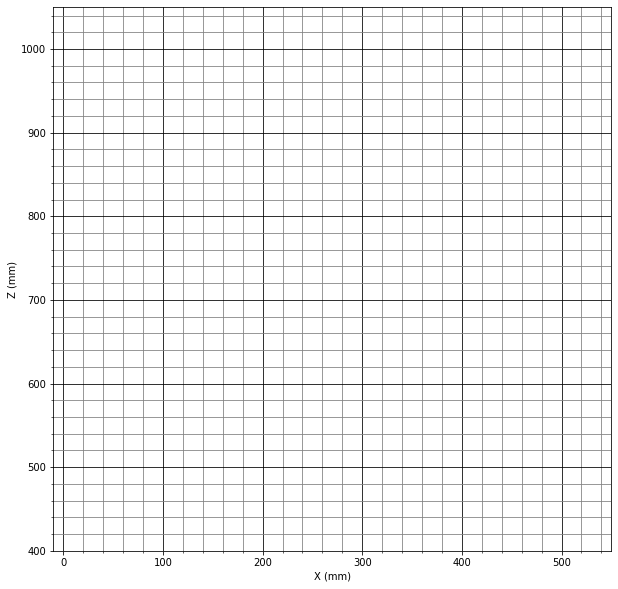

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs45=[]
zs45=[]
for i in range(xs.size):
    if(validThetaMinus45Offset[i,0,0]>0):
        xs45.append(xs[i])
        zs45.append(zs[i])
for i in range(len(zs45)):
    zs45[i]=zs45[i]
# plt.scatter(xs,zs,s=5,color='blue')
plt.scatter(xs45,zs45,s=5,color='red')
def split(l1,l2):
    same=[]
    foundSame = np.zeros((len(l1),len(l2)))
    for i in range(len(ll)):
        for j in range(len(l2)):
            if(l1[i]==l2[j]):
                same.append(l1[i])
                foundSame[i,j]=1
    return same

plt.title("Dorna 1 Achievable XZ positions 45deg w/ 40cm Tool 5cm Offset")
plt.savefig("XZ_SpatialFreedom45degWith5cmOffset40cmTool.png")